### Training deep neural networks

@cesans

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
import numpy as np

import deep_control as dc

import pandas
import seaborn as sns

/home/carlos/venv/py3/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


### Loading data

Previously generated trajectories can be loaded with *dc.data.load_trajectories*

In [4]:
import glob
import pickle
from tqdm import tqdm

files = glob.glob('../data/rw/*pic')

total = 0
trajs = []
for f in tqdm(files, leave=True):    
        rw = pickle.load(open(f,'rb'))
        for rwi in rw:
            traj = np.hstack((rwi[0], rwi[1]))
            df = pandas.DataFrame(data=traj)
            col_names = ['t', 'x', 'y', 'z', 'vz', 'theta', 'm', 'u1', 'u2']
            df.columns = col_names
            trajs.append(df)


100%|██████████| 835/835 [00:34<00:00, 24.20it/s]


In [5]:
ini_ps = np.vstack([t.values[0,:] for t in trajs])

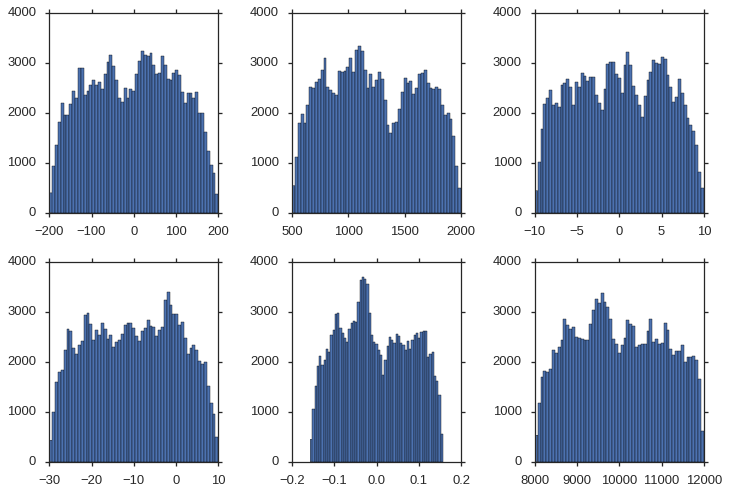

In [6]:
for i in range(3):
    for j in range(2):
            plt.subplot(2,3,i*2+j+1)
            plt.hist(ini_ps[:,i*2+j+1],59)
            plt.locator_params(nbins=5)            
            
plt.tight_layout()            

In [7]:
plot_idx_t = [(x,list(range(1,x)))for x in range(1,7)]

In [8]:
plot_idx = []

In [9]:
for p in plot_idx_t:
    for pi in p[1]:
        plot_idx.append((p[0],pi))        

In [10]:
plt.rcParams['figure.figsize'] = [30,20]


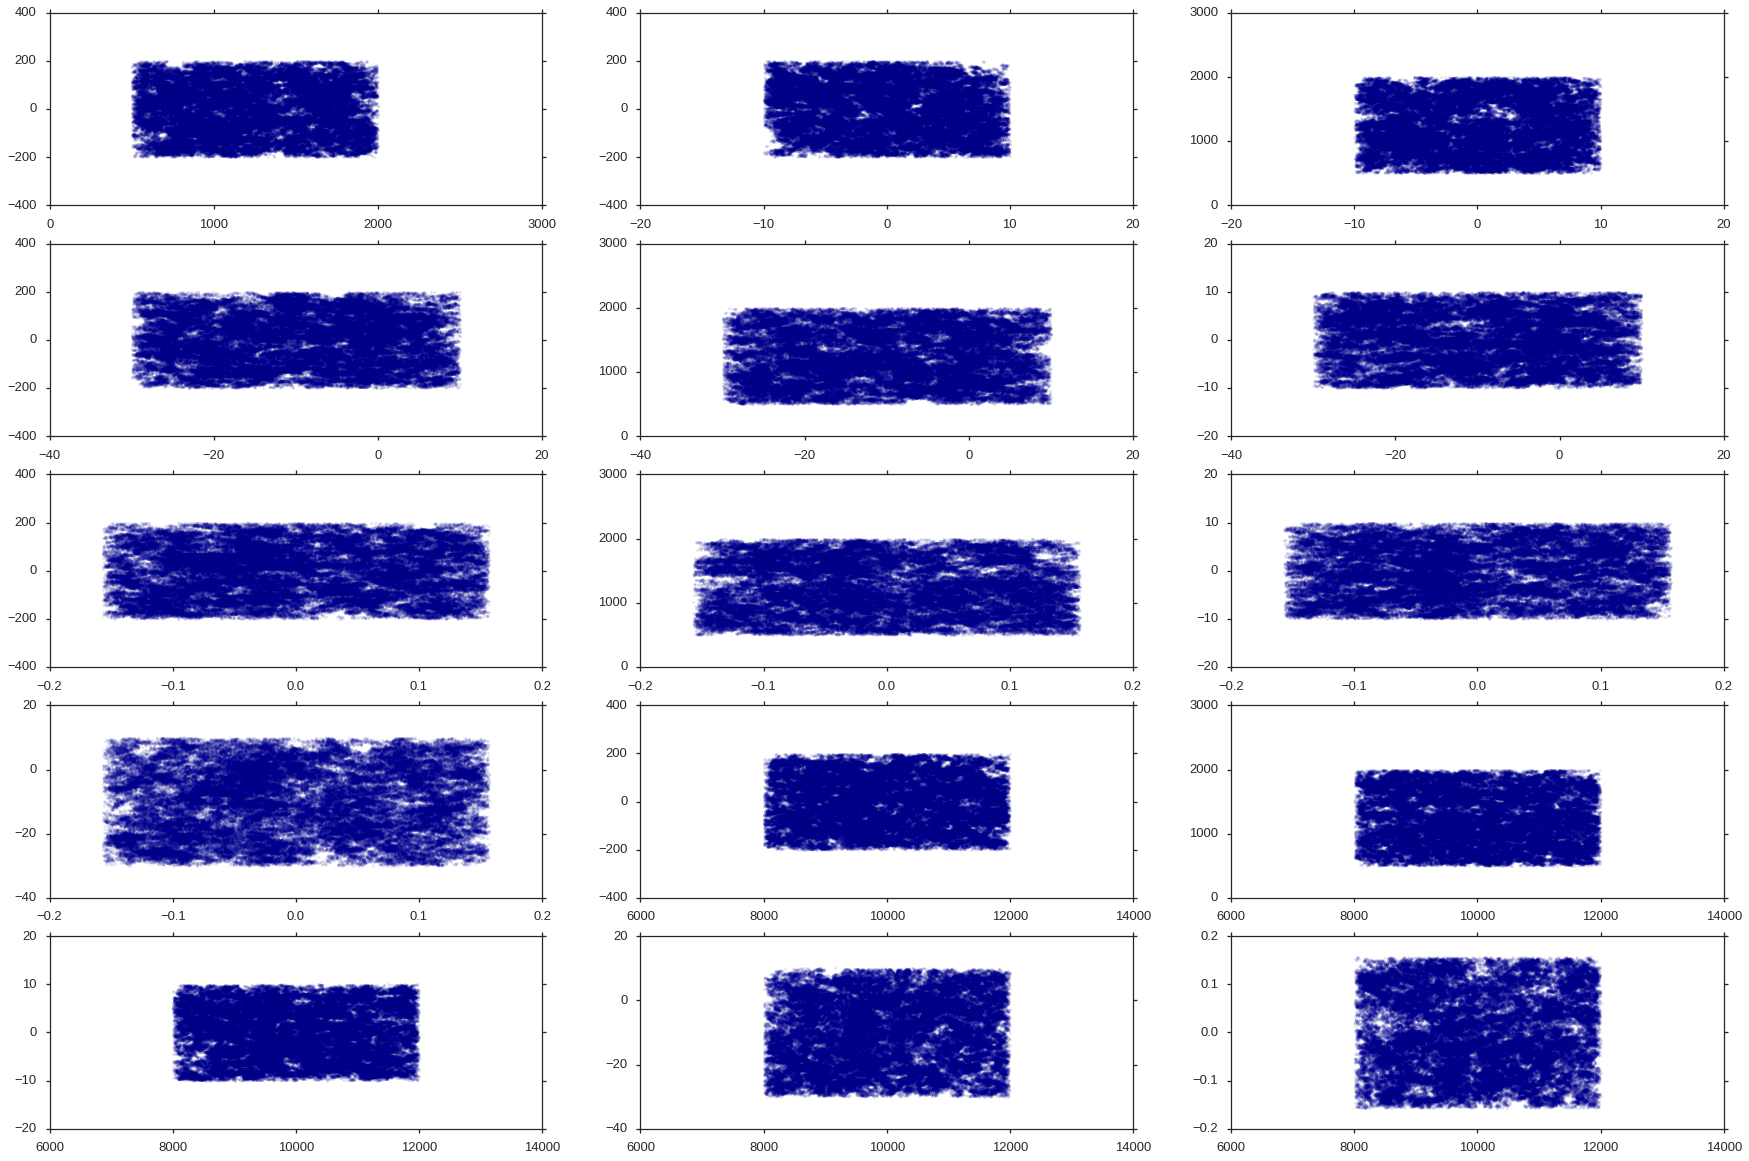

In [11]:
for i in range(5):
    for j in range(3):
        plt.subplot(5,3,i*3+j+1)
        plt.scatter(ini_ps[:,plot_idx[i*3+j][0]], ini_ps[:,plot_idx[i*3+j][1]], s=5, alpha=0.1)
        plt.locator_params(nbins=4)


## Training

From the trajectories we can generate the training sets:

In [12]:
train_p = 0.9 # proportion of training data
x_train, y_train, x_test, y_test, idx_train = dc.data.create_training_data(trajs, train_p = train_p, n_outputs=2)

Creating test data: 100%|██████████| 13952/13952 [00:02<00:00, 5677.02it/s]


In [13]:
dc.nn.save_training_data([x_train, y_train, x_test, y_test, idx_train], "rw")

We specify a model to train

In [107]:
model_description = {"data": "rw",
                     "control": dc.nn.DTHETA,
                     "nlayers": 3,
                     "units": 32, 
                     "output_mode": dc.nn.OUTPUT_LOG, 
                     "dropout": False,
                     "batch_size": 8, 
                     "epochs": 32, 
                     "lr": 0.001,
                     "input_vars" : 6,
                     "hidden_nonlinearity": "ReLu"}

In [108]:
dc.nn.train(model_description)

=====  MODEL ===========
hidden_nonlinearity:ReLu
units:32
output_mode:0
batch_size:8
epochs:32
control:1
nlayers:3
dropout:False
input_vars:6
lr:0.001
data:rw
Loading data...
Preprocessing...


Training, epoch 0:   0%|          | 298/1569525 [00:00<08:47, 2976.22it/s]

Training...


Training, epoch 0: 100%|██████████| 1569525/1569525 [04:27<00:00, 5861.70it/s]


epoch 0, train loss: 0.005884675996001617


Training, epoch 1:   0%|          | 561/1569525 [00:00<04:39, 5604.54it/s]

epoch 0, test loss: 0.005218977742781537


Training, epoch 1: 100%|██████████| 1569525/1569525 [04:26<00:00, 5893.68it/s]


epoch 1, train loss: 0.0050467460878931844


Training, epoch 2:   0%|          | 556/1569525 [00:00<04:42, 5554.30it/s]

epoch 1, test loss: 0.004961004638524899


Training, epoch 2: 100%|██████████| 1569525/1569525 [04:27<00:00, 5866.33it/s]


epoch 2, train loss: 0.0048709516718800335


Training, epoch 3:   0%|          | 526/1569525 [00:00<04:58, 5252.85it/s]

epoch 2, test loss: 0.0048174721228169725


Training, epoch 3: 100%|██████████| 1569525/1569525 [04:28<00:00, 5846.34it/s]


epoch 3, train loss: 0.004759851730159891


Training, epoch 4:   0%|          | 589/1569525 [00:00<04:26, 5884.79it/s]

epoch 3, test loss: 0.004736931771350061


Training, epoch 4: 100%|██████████| 1569525/1569525 [04:28<00:00, 5847.37it/s]


epoch 4, train loss: 0.004695412180968955


Training, epoch 5:   0%|          | 553/1569525 [00:00<04:43, 5526.97it/s]

epoch 4, test loss: 0.004751356571499387


Training, epoch 5: 100%|██████████| 1569525/1569525 [04:28<00:00, 5855.13it/s]


epoch 5, train loss: 0.004638336172548439


Training, epoch 6:   0%|          | 596/1569525 [00:00<04:23, 5959.79it/s]

epoch 5, test loss: 0.004694747268101571


Training, epoch 6: 100%|██████████| 1569525/1569525 [04:29<00:00, 5815.04it/s]


epoch 6, train loss: 0.004593807014785927


Training, epoch 7:   0%|          | 529/1569525 [00:00<04:56, 5282.83it/s]

epoch 6, test loss: 0.004641926223166325


Training, epoch 7: 100%|██████████| 1569525/1569525 [04:27<00:00, 5859.56it/s]


epoch 7, train loss: 0.00454960352804579


Training, epoch 8:   0%|          | 572/1569525 [00:00<04:34, 5719.08it/s]

epoch 7, test loss: 0.004631766916573325


Training, epoch 8: 100%|██████████| 1569525/1569525 [04:26<00:00, 5880.96it/s]


epoch 8, train loss: 0.00452435062340198


Training, epoch 9:   0%|          | 585/1569525 [00:00<04:28, 5845.48it/s]

epoch 8, test loss: 0.00458833986342344


Training, epoch 9: 100%|██████████| 1569525/1569525 [04:25<00:00, 5901.46it/s]


epoch 9, train loss: 0.004501105594274522


Training, epoch 10:   0%|          | 563/1569525 [00:00<04:39, 5620.97it/s]

epoch 9, test loss: 0.004578372272792735


Training, epoch 10: 100%|██████████| 1569525/1569525 [04:25<00:00, 5906.40it/s]


epoch 10, train loss: 0.004486284763034767


Training, epoch 11:   0%|          | 573/1569525 [00:00<04:34, 5721.48it/s]

epoch 10, test loss: 0.004563302807807049


Training, epoch 11: 100%|██████████| 1569525/1569525 [04:26<00:00, 5886.39it/s]


epoch 11, train loss: 0.00447183438770593


Training, epoch 12:   0%|          | 575/1569525 [00:00<04:33, 5741.00it/s]

epoch 11, test loss: 0.004532960835449449


Training, epoch 12: 100%|██████████| 1569525/1569525 [04:27<00:00, 5857.48it/s]


epoch 12, train loss: 0.004459012511377196


Training, epoch 13:   0%|          | 294/1569525 [00:00<08:54, 2936.30it/s]

epoch 12, test loss: 0.0045335290640059


Training, epoch 13: 100%|██████████| 1569525/1569525 [04:28<00:00, 5854.44it/s]


epoch 13, train loss: 0.004449449160311169


Training, epoch 14:   0%|          | 300/1569525 [00:00<08:44, 2994.50it/s]

epoch 13, test loss: 0.00451701909784615


Training, epoch 14: 100%|██████████| 1569525/1569525 [04:26<00:00, 5897.62it/s]


epoch 14, train loss: 0.004438661929692994


Training, epoch 15:   0%|          | 595/1569525 [00:00<04:23, 5949.42it/s]

epoch 14, test loss: 0.004506650286475899


Training, epoch 15: 100%|██████████| 1569525/1569525 [04:29<00:00, 5827.48it/s]


epoch 15, train loss: 0.0044309646368698545


Training, epoch 16:   0%|          | 297/1569525 [00:00<08:48, 2966.87it/s]

epoch 15, test loss: 0.004499658196262033


Training, epoch 16: 100%|██████████| 1569525/1569525 [04:28<00:00, 5855.23it/s]


epoch 16, train loss: 0.0044263591355060555


Training, epoch 17:   0%|          | 614/1569525 [00:00<04:15, 6138.41it/s]

epoch 16, test loss: 0.004498684213400854


Training, epoch 17: 100%|██████████| 1569525/1569525 [04:27<00:00, 5868.03it/s]


epoch 17, train loss: 0.004412477563738022


Training, epoch 18:   0%|          | 581/1569525 [00:00<04:30, 5802.48it/s]

epoch 17, test loss: 0.004483743919835307


Training, epoch 18: 100%|██████████| 1569525/1569525 [04:31<00:00, 5786.94it/s]


epoch 18, train loss: 0.004403916794410152


Training, epoch 19:   0%|          | 523/1569525 [00:00<05:00, 5222.67it/s]

epoch 18, test loss: 0.00448736683801034


Training, epoch 19: 100%|██████████| 1569525/1569525 [04:28<00:00, 5837.98it/s]


epoch 19, train loss: 0.004397182227919171


Training, epoch 20:   0%|          | 570/1569525 [00:00<04:35, 5692.17it/s]

epoch 19, test loss: 0.00448127751914247


Training, epoch 20: 100%|██████████| 1569525/1569525 [04:28<00:00, 5852.09it/s]


epoch 20, train loss: 0.00439108993935155


Training, epoch 21:   0%|          | 578/1569525 [00:00<04:31, 5774.90it/s]

epoch 20, test loss: 0.0044810636556529525


Training, epoch 21: 100%|██████████| 1569525/1569525 [04:27<00:00, 5863.43it/s]


epoch 21, train loss: 0.004385659668349114


Training, epoch 22:   0%|          | 510/1569525 [00:00<05:07, 5095.90it/s]

epoch 21, test loss: 0.0044734220301736695


Training, epoch 22: 100%|██████████| 1569525/1569525 [04:29<00:00, 5819.22it/s]


epoch 22, train loss: 0.004377750940403294


Training, epoch 23:   0%|          | 559/1569525 [00:00<04:40, 5584.81it/s]

epoch 22, test loss: 0.004474288519301252


Training, epoch 23: 100%|██████████| 1569525/1569525 [04:28<00:00, 5837.51it/s]


epoch 23, train loss: 0.004387738765911584


Training, epoch 24:   0%|          | 582/1569525 [00:00<04:29, 5811.39it/s]

epoch 23, test loss: 0.004499458212515613


Training, epoch 24: 100%|██████████| 1569525/1569525 [04:26<00:00, 5880.42it/s]


epoch 24, train loss: 0.004374078651297016


Training, epoch 25:   0%|          | 520/1569525 [00:00<05:02, 5193.84it/s]

epoch 24, test loss: 0.004494861059186042


Training, epoch 25: 100%|██████████| 1569525/1569525 [04:29<00:00, 5816.27it/s]


epoch 25, train loss: 0.004365763861343913


Training, epoch 26:   0%|          | 552/1569525 [00:00<04:44, 5510.93it/s]

epoch 25, test loss: 0.004492303154226485


Training, epoch 26: 100%|██████████| 1569525/1569525 [04:31<00:00, 5774.04it/s]


epoch 26, train loss: 0.004361569749369389


Training, epoch 27:   0%|          | 527/1569525 [00:00<04:58, 5262.69it/s]

epoch 26, test loss: 0.00448491488837497


Training, epoch 27: 100%|██████████| 1569525/1569525 [04:29<00:00, 5824.57it/s]


epoch 27, train loss: 0.00435612173320378


Training, epoch 28:   0%|          | 543/1569525 [00:00<04:49, 5424.94it/s]

epoch 27, test loss: 0.004460727677558425


Training, epoch 28: 100%|██████████| 1569525/1569525 [04:29<00:00, 5826.79it/s]


epoch 28, train loss: 0.004352360326018369


Training, epoch 29:   0%|          | 580/1569525 [00:00<04:30, 5794.22it/s]

epoch 28, test loss: 0.004471629358711336


Training, epoch 29: 100%|██████████| 1569525/1569525 [04:29<00:00, 5830.35it/s]


epoch 29, train loss: 0.004347776834733028


Training, epoch 30:   0%|          | 584/1569525 [00:00<04:28, 5832.62it/s]

epoch 29, test loss: 0.004449643268271545


Training, epoch 30: 100%|██████████| 1569525/1569525 [04:31<00:00, 5788.50it/s]


epoch 30, train loss: 0.0043441303353231086


Training, epoch 31:   0%|          | 492/1569525 [00:00<05:19, 4918.14it/s]

epoch 30, test loss: 0.004453305379986348


Training, epoch 31: 100%|██████████| 1569525/1569525 [04:23<00:00, 5963.65it/s]


epoch 31, train loss: 0.004339432656538007
epoch 31, test loss: 0.004466959195999835


In [14]:
model_description = {"data": "rw",
                     "control": dc.nn.THRUST,
                     "nlayers": 3,
                     "units": 32, 
                     "output_mode": dc.nn.OUTPUT_LOG, 
                     "dropout": False,
                     "batch_size": 8, 
                     "epochs": 32, 
                     "lr": 0.001,
                     "input_vars" : 6,
                     "hidden_nonlinearity": "ReLu"}

dc.nn.train(model_description)

=====  MODEL ===========
data:rw
control:0
lr:0.001
dropout:False
epochs:32
hidden_nonlinearity:ReLu
batch_size:8
units:32
output_mode:0
input_vars:6
nlayers:3
Loading data...
Preprocessing...


Training, epoch 0:   0%|          | 544/1569525 [00:00<04:48, 5431.42it/s]

Training...


Training, epoch 0: 100%|██████████| 1569525/1569525 [04:27<00:00, 5862.15it/s]


epoch 0, train loss: 0.05331327966138121


Training, epoch 1:   0%|          | 487/1569525 [00:00<05:22, 4866.66it/s]

epoch 0, test loss: 0.04603745557334462


Training, epoch 1: 100%|██████████| 1569525/1569525 [04:29<00:00, 5830.70it/s]


epoch 1, train loss: 0.034503542401864845


Training, epoch 2:   0%|          | 243/1569525 [00:00<10:47, 2423.69it/s]

epoch 1, test loss: 0.04628350864793377


Training, epoch 2: 100%|██████████| 1569525/1569525 [04:25<00:00, 5915.81it/s]


epoch 2, train loss: 0.02991223576573582


Training, epoch 3:   0%|          | 526/1569525 [00:00<04:58, 5258.06it/s]

epoch 2, test loss: 0.0539071763036233


Training, epoch 3: 100%|██████████| 1569525/1569525 [04:29<00:00, 5822.92it/s]


epoch 3, train loss: 0.027352066135552567


Training, epoch 4:   0%|          | 551/1569525 [00:00<04:44, 5508.36it/s]

epoch 3, test loss: 0.0494317216719447


Training, epoch 4: 100%|██████████| 1569525/1569525 [04:29<00:00, 5827.65it/s]


epoch 4, train loss: 0.025804800586401035


Training, epoch 5:   0%|          | 566/1569525 [00:00<04:37, 5652.16it/s]

epoch 4, test loss: 0.05773664159890147


Training, epoch 5: 100%|██████████| 1569525/1569525 [04:28<00:00, 5840.68it/s]


epoch 5, train loss: 0.024777876648734102


Training, epoch 6:   0%|          | 558/1569525 [00:00<04:41, 5575.58it/s]

epoch 5, test loss: 0.03991408120871996


Training, epoch 6: 100%|██████████| 1569525/1569525 [04:29<00:00, 5827.22it/s]


epoch 6, train loss: 0.024034496941387446


Training, epoch 7:   0%|          | 533/1569525 [00:00<04:54, 5320.50it/s]

epoch 6, test loss: 0.03250454884607609


Training, epoch 7: 100%|██████████| 1569525/1569525 [04:27<00:00, 5864.27it/s]


epoch 7, train loss: 0.023323525764750584


Training, epoch 8:   0%|          | 567/1569525 [00:00<04:37, 5663.78it/s]

epoch 7, test loss: 0.029843700867335857


Training, epoch 8: 100%|██████████| 1569525/1569525 [04:28<00:00, 5847.09it/s]


epoch 8, train loss: 0.02287754113598229


Training, epoch 9:   0%|          | 568/1569525 [00:00<04:36, 5675.38it/s]

epoch 8, test loss: 0.026253742230958062


Training, epoch 9: 100%|██████████| 1569525/1569525 [04:28<00:00, 5841.74it/s]


epoch 9, train loss: 0.02246415764536637


Training, epoch 10:   0%|          | 549/1569525 [00:00<04:45, 5487.55it/s]

epoch 9, test loss: 0.02712809507976869


Training, epoch 10: 100%|██████████| 1569525/1569525 [04:28<00:00, 5854.38it/s]


epoch 10, train loss: 0.022056780776223667


Training, epoch 11:   0%|          | 535/1569525 [00:00<04:53, 5349.07it/s]

epoch 10, test loss: 0.028517104103845836


Training, epoch 11: 100%|██████████| 1569525/1569525 [04:29<00:00, 5817.73it/s]


epoch 11, train loss: 0.021835360211554987


Training, epoch 12:   0%|          | 520/1569525 [00:00<05:02, 5195.32it/s]

epoch 11, test loss: 0.03349674425729184


Training, epoch 12: 100%|██████████| 1569525/1569525 [04:29<00:00, 5830.32it/s]


epoch 12, train loss: 0.02170457708257082


Training, epoch 13:   0%|          | 565/1569525 [00:00<04:38, 5642.07it/s]

epoch 12, test loss: 0.02647190093964739


Training, epoch 13: 100%|██████████| 1569525/1569525 [04:32<00:00, 5756.51it/s]


epoch 13, train loss: 0.021448131671383635


Training, epoch 14:   0%|          | 541/1569525 [00:00<04:50, 5409.42it/s]

epoch 13, test loss: 0.026659520789527186


Training, epoch 14: 100%|██████████| 1569525/1569525 [04:30<00:00, 5793.32it/s]


epoch 14, train loss: 0.021317916702281784


Training, epoch 15:   0%|          | 560/1569525 [00:00<04:40, 5599.77it/s]

epoch 14, test loss: 0.029424819803891056


Training, epoch 15: 100%|██████████| 1569525/1569525 [04:33<00:00, 5736.13it/s]


epoch 15, train loss: 0.021160616277354004


Training, epoch 16:   0%|          | 553/1569525 [00:00<04:43, 5529.06it/s]

epoch 15, test loss: 0.02790871622915811


Training, epoch 16: 100%|██████████| 1569525/1569525 [04:31<00:00, 5780.89it/s]


epoch 16, train loss: 0.02125332494363188


Training, epoch 17:   0%|          | 536/1569525 [00:00<04:53, 5352.83it/s]

epoch 16, test loss: 0.03012238330325829


Training, epoch 17: 100%|██████████| 1569525/1569525 [04:34<00:00, 5724.57it/s]


epoch 17, train loss: 0.021276770649603184


Training, epoch 18:   0%|          | 542/1569525 [00:00<04:49, 5411.03it/s]

epoch 17, test loss: 0.029246892410658098


Training, epoch 18: 100%|██████████| 1569525/1569525 [04:36<00:00, 5672.75it/s]


epoch 18, train loss: 0.021210372559981264


Training, epoch 19:   0%|          | 521/1569525 [00:00<05:01, 5208.54it/s]

epoch 18, test loss: 0.033136175872764566


Training, epoch 19: 100%|██████████| 1569525/1569525 [04:32<00:00, 5757.33it/s]


epoch 19, train loss: 0.02101513645807224


Training, epoch 20:   0%|          | 543/1569525 [00:00<04:49, 5426.18it/s]

epoch 19, test loss: 0.033187452859712134


Training, epoch 20: 100%|██████████| 1569525/1569525 [04:30<00:00, 5792.61it/s]


epoch 20, train loss: 0.021013121950259523


Training, epoch 21:   0%|          | 526/1569525 [00:00<04:58, 5250.93it/s]

epoch 20, test loss: 0.025823365921296453


Training, epoch 21: 100%|██████████| 1569525/1569525 [04:30<00:00, 5791.90it/s]


epoch 21, train loss: 0.020946354476536755


Training, epoch 22:   0%|          | 526/1569525 [00:00<04:58, 5259.92it/s]

epoch 21, test loss: 0.03473290886605966


Training, epoch 22: 100%|██████████| 1569525/1569525 [04:32<00:00, 5755.01it/s]


epoch 22, train loss: 0.020833191167066258


Training, epoch 23:   0%|          | 555/1569525 [00:00<04:43, 5542.02it/s]

epoch 22, test loss: 0.027354459244722636


Training, epoch 23: 100%|██████████| 1569525/1569525 [04:31<00:00, 5786.13it/s]


epoch 23, train loss: 0.020879731293638137


Training, epoch 24:   0%|          | 351/1569525 [00:00<07:27, 3506.93it/s]

epoch 23, test loss: 0.03011823880706432


Training, epoch 24: 100%|██████████| 1569525/1569525 [04:31<00:00, 5773.65it/s]


epoch 24, train loss: 0.020948517509349313


Training, epoch 25:   0%|          | 540/1569525 [00:00<04:50, 5395.40it/s]

epoch 24, test loss: 0.03357128399396982


Training, epoch 25: 100%|██████████| 1569525/1569525 [04:27<00:00, 5873.16it/s]


epoch 25, train loss: 0.020834326956032302


Training, epoch 26:   0%|          | 546/1569525 [00:00<04:47, 5456.99it/s]

epoch 25, test loss: 0.04109398293620223


Training, epoch 26: 100%|██████████| 1569525/1569525 [04:31<00:00, 5781.14it/s]


epoch 26, train loss: 0.020844660681313423


Training, epoch 27:   0%|          | 526/1569525 [00:00<04:58, 5253.88it/s]

epoch 26, test loss: 0.028143734350667644


Training, epoch 27: 100%|██████████| 1569525/1569525 [04:28<00:00, 5853.20it/s]


epoch 27, train loss: 0.021006940939689727


Training, epoch 28:   0%|          | 526/1569525 [00:00<04:58, 5253.79it/s]

epoch 27, test loss: 0.03211887236727108


Training, epoch 28: 100%|██████████| 1569525/1569525 [04:30<00:00, 5804.65it/s]


epoch 28, train loss: 0.02079757822894952


Training, epoch 29:   0%|          | 592/1569525 [00:00<04:25, 5913.96it/s]

epoch 28, test loss: 0.033182978045276736


Training, epoch 29: 100%|██████████| 1569525/1569525 [04:32<00:00, 5757.21it/s]


epoch 29, train loss: 0.021023597086126538


Training, epoch 30:   0%|          | 532/1569525 [00:00<04:55, 5312.66it/s]

epoch 29, test loss: 0.029192816577183398


Training, epoch 30: 100%|██████████| 1569525/1569525 [04:30<00:00, 5808.23it/s]


epoch 30, train loss: 0.021225433442633605


Training, epoch 31:   0%|          | 539/1569525 [00:00<04:51, 5384.63it/s]

epoch 30, test loss: 0.031293233528938244


Training, epoch 31: 100%|██████████| 1569525/1569525 [04:28<00:00, 5842.09it/s]


epoch 31, train loss: 0.021074089376790305
epoch 31, test loss: 0.03375427027167236


In [15]:
model_th = dc.nn.load_model('nets/rw/0/ReLu_outputLog_3_32.model')
network_th = dc.nn.load_network(model_th, base_dir='')

In [16]:
model_dth = dc.nn.load_model('nets/rw/1/ReLu_outputLog_3_32.model')
network_dth = dc.nn.load_network(model_dth, base_dir='')

networks = [(model_th, network_th),
            (model_dth, network_dth)]

In [17]:
data = dc.nn.load_training_data(model_dth, '')

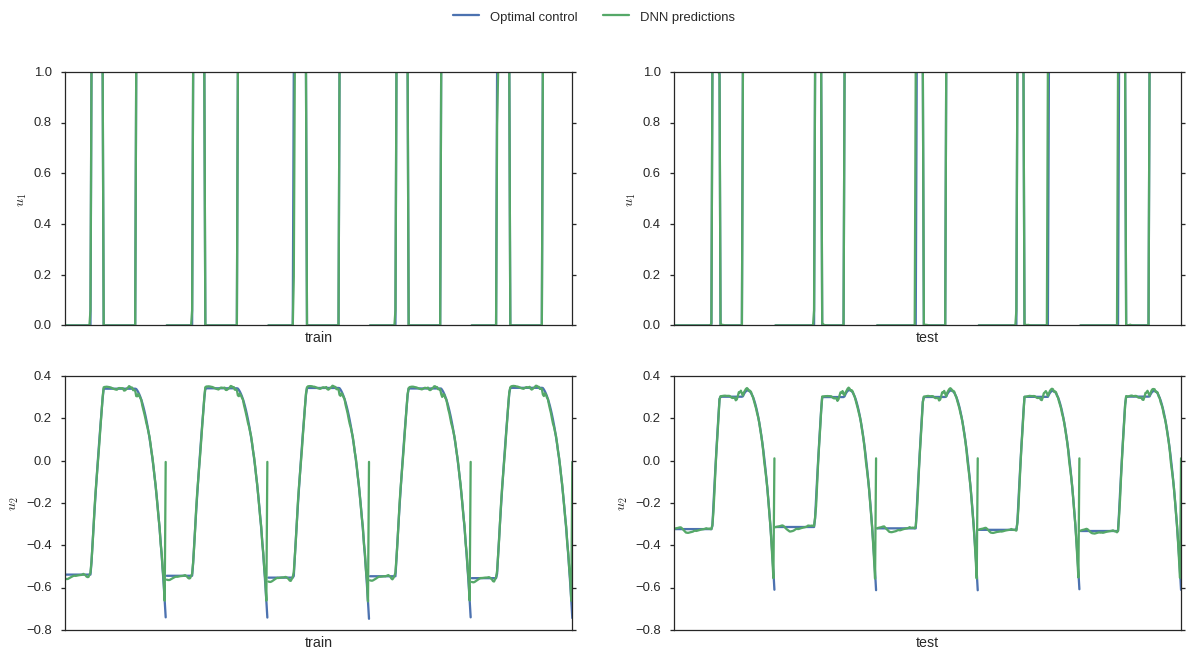

In [33]:
plt.rcParams['figure.figsize'] = [20,5*len(networks)]

fig = plt.figure()

batch = 1000
b = 20
traj_length = 100

for s, dset in enumerate(['train', 'test']):
    for i,(model,network) in enumerate(networks):
        plt.subplot(len(networks), 2, i*2+s+1)
        u = np.zeros((batch,len(networks)))
        network_input = data['X_'+dset][b*batch:(b+1)*batch,:]
        ui = network['pred'](network_input) 
        u[:,i] = ui[:,0]

        u = dc.nn.postprocess(model, u)
        u_gt = data['Y_'+dset][b*batch:(b+1)*batch,:].copy()        
        u_gt = dc.nn.postprocess(model, u_gt)   
                
        for j in range(5):
            label_1, = plt.plot(np.arange(traj_length)+j*traj_length,u_gt[j*traj_length:(j+1)*traj_length,i], c=sns.color_palette()[0])
        
        plt.gca().get_xaxis().set_ticks([])
        plt.ylabel(r'$' + 'u_'+str(i+1)+'$')
        ylims = plt.ylim()

        plt.subplot(len(networks), 2, i*2+s+1)        
        for j in range(5):
            label_2, = plt.plot(np.arange(traj_length)+j*traj_length, u[j*traj_length:(j+1)*traj_length,i], c=sns.color_palette()[1])
        
        #plt.locator_params(axis='y', nbins=1)
        plt.gca().get_xaxis().set_ticks([])
        plt.ylim(ylims)
        plt.xlabel(dset)
                
plt.figlegend([label_1,label_2], ['Optimal control', 'DNN predictions'], loc='upper center', ncol=2)
